In [24]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

Встановлюємо гіперпараметри:

In [25]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [26]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

In [27]:
len(input_train[0]), len(input_train[1]), len(input_train[2])  # Перевірка довжини перших трьох текстів

(218, 189, 141)

Передпроцесинг послідовних даних:

In [28]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

In [29]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [30]:
input_train.shape

(25000, 500)

Побудова простої моделі RNN:

In [31]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(input_dim=max_features, output_dim=32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання SimpleRNN шару з 32 вузлами
model.add(SimpleRNN(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

Компіляція моделі:

In [32]:
model.build(input_shape=(None, maxlen))

In [33]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,113 (1.23 MB)

 Trainable params: 322,113 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Навчання моделі:

In [35]:
history = model.fit(
    input_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - acc: 0.5722 - loss: 0.6727 - val_acc: 0.7931 - val_loss: 0.4519
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - acc: 0.8021 - loss: 0.4426 - val_acc: 0.8175 - val_loss: 0.4131
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - acc: 0.8636 - loss: 0.3303 - val_acc: 0.8353 - val_loss: 0.3719
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - acc: 0.9040 - loss: 0.2452 - val_acc: 0.8524 - val_loss: 0.3695
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - acc: 0.9332 - loss: 0.1844 - val_acc: 0.7832 - val_loss: 0.5524


Відображення результатів:

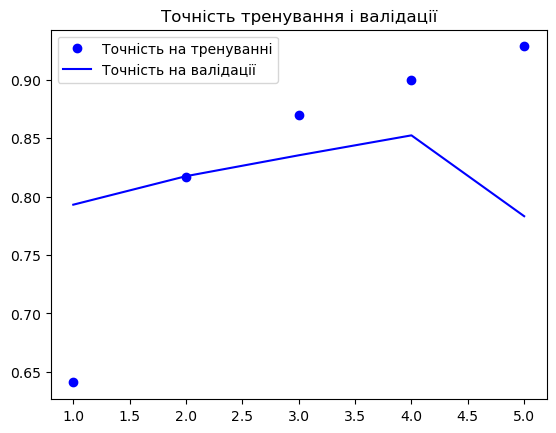

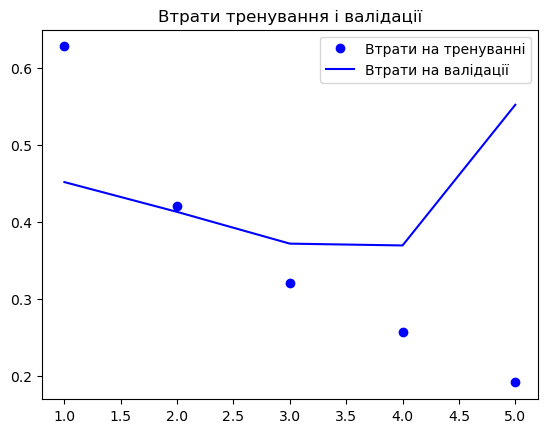

In [36]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [37]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.7824 - loss: 0.5596
Test Loss: 0.5511372089385986
Test Accuracy: 0.7841600179672241


Analysis

Channel 1


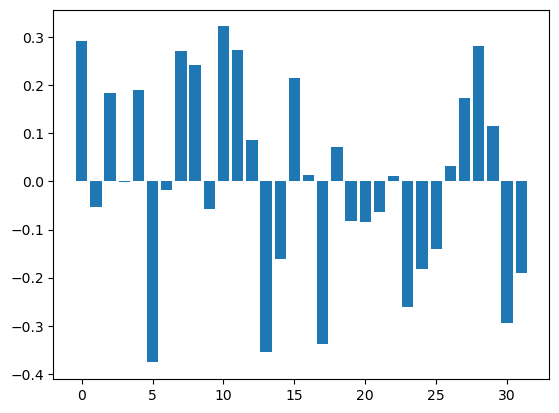

Channel 2


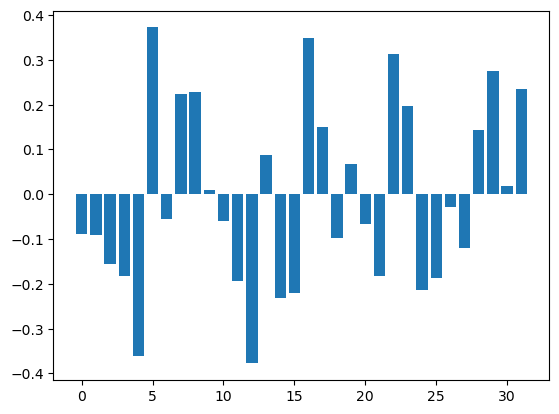

Channel 3


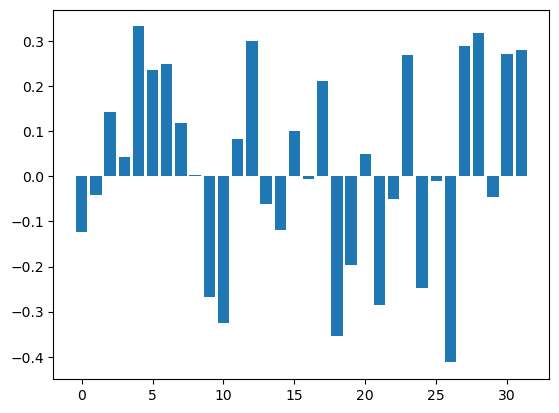

Channel 4


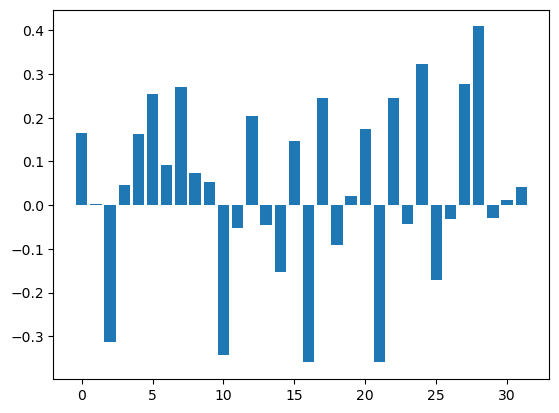

In [38]:
for i in range(4):
    print(f"Channel {i + 1}")
    plt.bar(range(32), model.layers[1].weights[0].numpy()[:,i])
    plt.show()

In [39]:
%load_ext tensorboard
import datetime, os
import tensorflow as tf
log_dir = os.path.join(
    "logs",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
model.fit(input_train, y_train, epochs=50, batch_size=128, validation_split=0.3, callbacks=[tensorboard_callback])
# Запуск TensorBoard для візуалізації навчання
# Виконайте в терміналі команду: tensorboard --logdir=logs
# Потім відкрийте браузер і перейдіть за адресою http://localhost:6006/
# Це дозволить вам переглядати графіки та інші метрики навчання моделі
# Пам'ятайте, що для коректної роботи TensorBoard потрібно встановити бібліотеку TensorFlow та запустити сервер TensorBoard у терміналі.
# Якщо ви використовуєте Jupyter Notebook, ви можете запустити TensorBoard прямо в ньому, використовую
# %tensorboard --logdir logs
# Ця команда дозволить вам переглядати TensorBoard прямо в Jupyter Notebook без необхідності відкривати окремий браузер.
# Пам'ятайте, що для цього потрібно мати встановлену бібліотеку TensorFlow та Jupyter Notebook, а також запустити навчання моделі з параметром callbacks, що включає tensorboard_callback.

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - acc: 0.9565 - loss: 0.1299 - val_acc: 0.8125 - val_loss: 0.4474
Epoch 2/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - acc: 0.9707 - loss: 0.0934 - val_acc: 0.8573 - val_loss: 0.4892
Epoch 3/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - acc: 0.9764 - loss: 0.0700 - val_acc: 0.8497 - val_loss: 0.5160
Epoch 4/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - acc: 0.9856 - loss: 0.0514 - val_acc: 0.8428 - val_loss: 0.5289
Epoch 5/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - acc: 0.9909 - loss: 0.0315 - val_acc: 0.8320 - val_loss: 0.5936
Epoch 6/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - acc: 0.9926 - loss: 0.0250 - val_acc: 0.8156 - val_loss: 0.6310
Epoch 7/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - acc: 0.9949 - loss: 0.0184 - val_acc: 0.8261 - val_loss: 0.6532
Epoch 8/50
137/137 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - acc: 0.9919 - loss: 0.

In [40]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 26148), started 8:49:52 ago. (Use '!kill 26148' to kill it.)

In [41]:
model.layers[1](model.layers[0](input_train[:1]))

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[ 0.04906216, -0.11693377, -0.850225  , -0.44437706, -0.06675973,
        -0.3299294 , -0.80011976,  0.0615028 ,  0.51557237,  0.33414805,
         0.88583267,  0.20058681, -0.26872802,  0.8052685 , -0.7764269 ,
         0.7720478 ,  0.5547518 , -0.2708538 , -0.74702835,  0.23526648,
        -0.0684045 , -0.42041463,  0.34164155,  0.28161332, -0.33514306,
        -0.56555736, -0.3382926 ,  0.6557507 , -0.34911144, -0.21826673,
         0.7826353 ,  0.10624545]], dtype=float32)>

In [42]:
model.layers[1]

<SimpleRNN name=simple_rnn_2, built=True>

In [43]:
import keras
new_rnn = SimpleRNN(
    units=32,  # Кількість нейронів (вихідних елементів) у RNN
    return_sequences=True,  # Повертає повну послідовність виходів (а не лише останній крок)
    return_state=True,  # Крім виходу, повертає ще й кінцевий стан (стан останнього таймстепу)
    kernel_initializer=keras.initializers.RandomNormal(stddev=0.001),
    # Ініціалізатор для вхідних ваг (kernel), використовується нормальний розподіл з дуже малим відхиленням
    recurrent_initializer=keras.initializers.Identity(gain=-1.0),
    # Ініціалізатор для рекурентних ваг (recurrent_kernel), матриця одинична, помножена на -1
    # Це означає, що початково шар копіює (та інвертує) стан із кроку t-1
)

# Передаємо через перший шар моделі (це Embedding) перший приклад з input_train
# Це оброблений вхід, який ми подаємо до RNN
processed_input = model.layers[0](input_train[:1])  # input_train[:1] — лише один приклад

# Проганяємо processed_input через новий RNN-шар (new_rnn)
# Повертаються: всі виходи (по кожному кроку часу) + фінальний стан
output, final_state = new_rnn(processed_input)

# Копіюємо ваги з існуючого RNN шару моделі до new_rnn
# model.layers[1] — це RNN-шар у моделі
new_rnn.set_weights(model.layers[1].get_weights())
# Це гарантує, що new_rnn має ті ж параметри, що й модель


# Повторно викликаємо new_rnn на тому ж прикладі після встановлення ваг
# Тепер new_rnn повинен працювати ідентично існуючому RNN-шару моделі
output, final_state = new_rnn(model.layers[0](input_train[:1]))

output.shape, final_state.shape

(TensorShape([1, 500, 32]), TensorShape([1, 32]))

In [44]:
output, final_state

(<tf.Tensor: shape=(1, 500, 32), dtype=float32, numpy=
 array([[[ 5.4490739e-01,  8.5517734e-02, -3.7422833e-01, ...,
          -4.2714682e-01,  4.7777054e-01,  3.6126587e-01],
         [ 8.4482932e-01, -2.1211363e-02, -7.7344012e-01, ...,
          -6.1477357e-01,  7.3552012e-01,  6.5154231e-01],
         [ 9.5764780e-01,  1.2053549e-04, -8.9433265e-01, ...,
          -8.0589902e-01,  8.9522064e-01,  7.0541167e-01],
         ...,
         [ 2.7864158e-01,  6.6169572e-01, -5.4059285e-01, ...,
          -1.8125460e-01,  7.8394902e-01,  2.2571975e-01],
         [ 6.2677759e-01,  1.6265582e-01, -4.5694840e-01, ...,
          -2.5923839e-01,  5.9393686e-01,  7.6987743e-02],
         [ 4.9062159e-02, -1.1693377e-01, -8.5022497e-01, ...,
          -2.1826673e-01,  7.8263527e-01,  1.0624545e-01]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 32), dtype=float32, numpy=
 array([[ 0.04906216, -0.11693377, -0.850225  , -0.44437706, -0.06675973,
         -0.3299294 , -0.80011976,  0.0615028 ,  0.51557

In [45]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

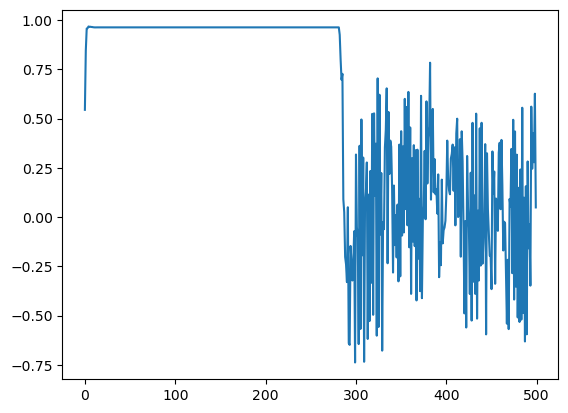

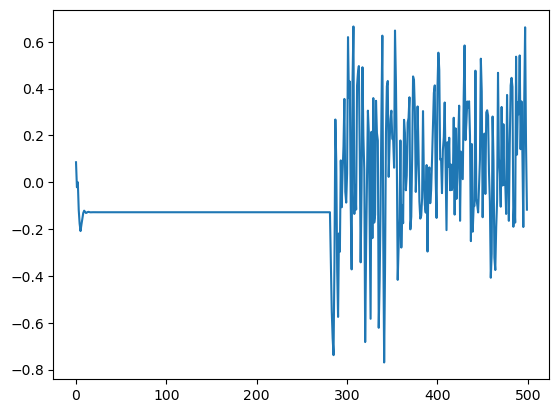

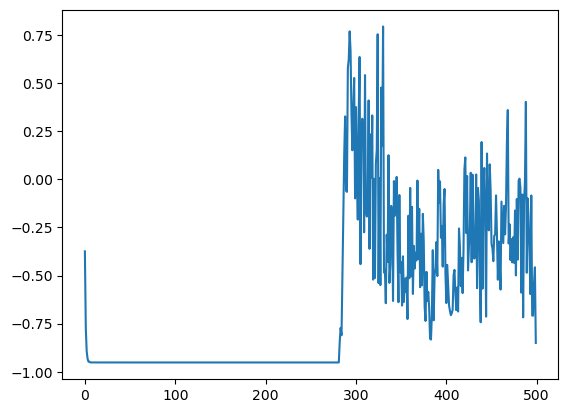

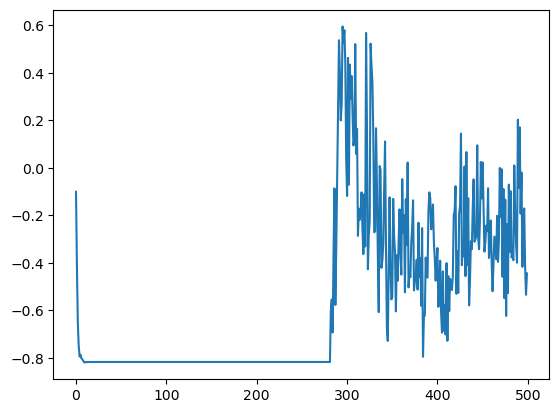

In [46]:
for i in range(4):
    plt.plot(output.numpy()[0][:,i])
    plt.show()

<BarContainer object of 32 artists>

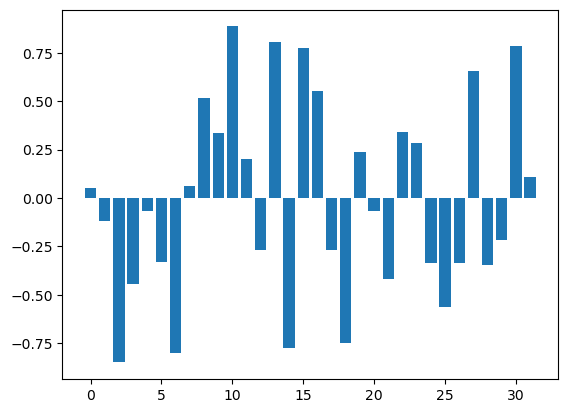

In [47]:
plt.bar(range(32), final_state[0])